# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
data = pd.read_csv('Clean_Training.csv')
df_test = pd.DataFrame(data, columns = ['TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','CurrencyCode'
                                    ,'CountryCode','ProviderId','ProductId','ProductCategory','ChannelId','Amount','Value',
                                   'Date','Time','PricingStrategy','FraudResult'])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionId    95662 non-null  object 
 1   BatchId          95662 non-null  object 
 2   AccountId        95662 non-null  object 
 3   SubscriptionId   95662 non-null  object 
 4   CustomerId       95662 non-null  object 
 5   CurrencyCode     95662 non-null  object 
 6   CountryCode      95662 non-null  int64  
 7   ProviderId       95662 non-null  object 
 8   ProductId        95662 non-null  object 
 9   ProductCategory  95662 non-null  object 
 10  ChannelId        95662 non-null  object 
 11  Amount           95662 non-null  float64
 12  Value            95662 non-null  float64
 13  Date             95662 non-null  object 
 14  Time             95662 non-null  object 
 15  PricingStrategy  95662 non-null  int64  
 16  FraudResult      95662 non-null  int64  
dtypes: float64(2

In [4]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.857110e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.230956e+05,0.732924,0.044872
min,256.0,-1.000000e+06,1.200000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [5]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,Date,Time,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15,2:18:49,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15,2:19:08,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15,2:44:21,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,20000.0,2018-11-15,3:32:55,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15,3:34:21,2,0


# Exploratory Data Analysis



In [6]:
cat_cols = ['ProductId','ProductCategory',
            'ProviderId', 'ChannelId']
num_cols = ['Amount', 'FraudResult','PricingStrategy']

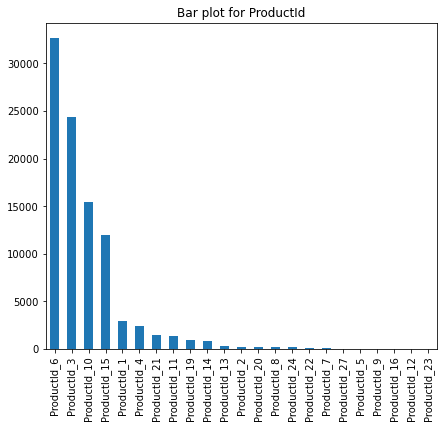

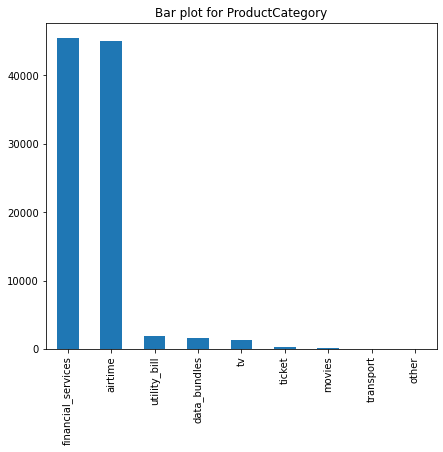

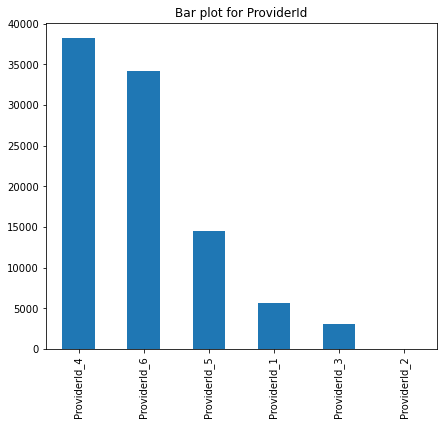

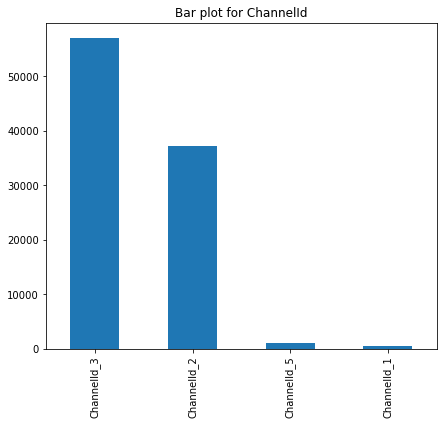

In [7]:
for col in cat_cols:
    fig = plt.figure(figsize=(7,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = data[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)

From our Barpots above:

1. We observe that Product_6, 3, 10 and 15 were purchased more than other products
    -These were under the ProductCategory financial Services and airtime
2. In correlation to Statement 1, financial services and airtem have the highest count number in ProductCategory
3. From Plot 3, we see that provider_4 and Provider_6 had high counts due to their productCategory
4. ChannelId_3 was used for payments more than every other platform

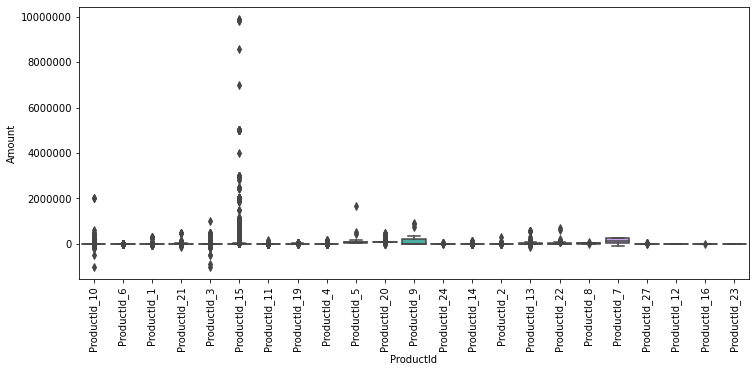

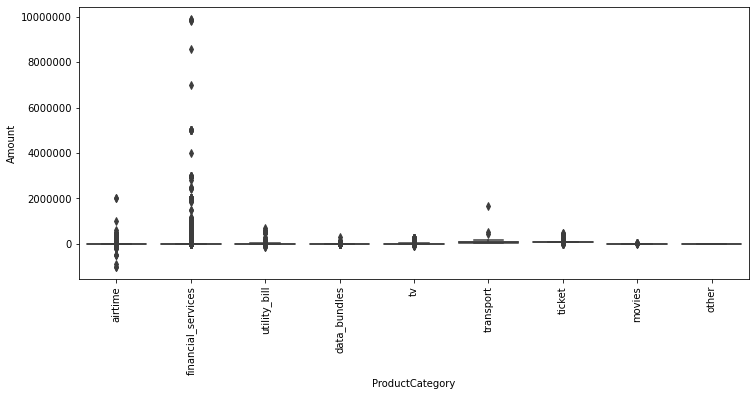

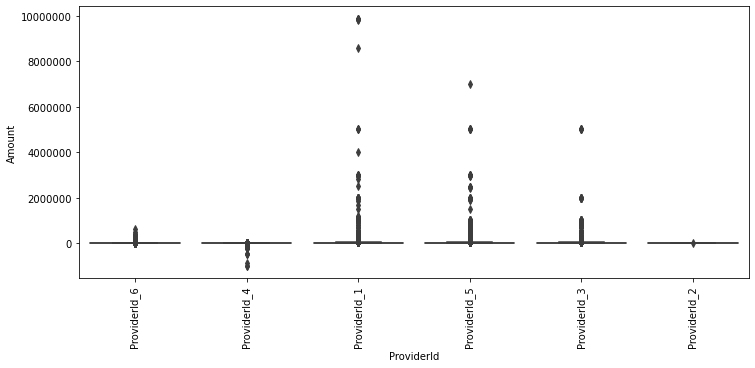

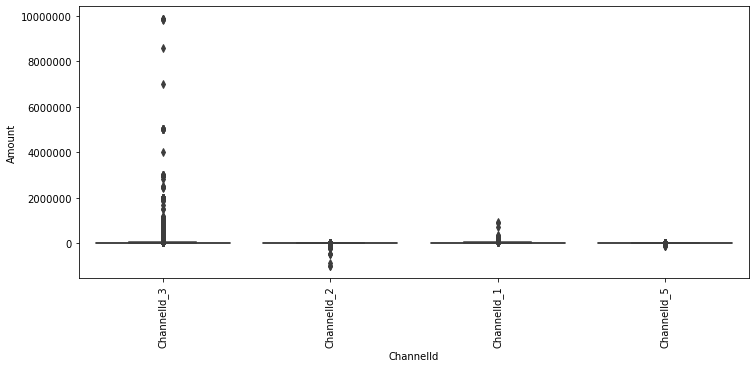

In [8]:
for col in cat_cols:
    plt.figure(figsize = (12,5))
    sns.boxplot(col, 'Amount', data=data)
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Amount')# Set text for y axis
    plt.show()

Looking at the boxplot between out categorical variables and amount:
1.Product_15 has more transaction with high Amount than any other Value 
2.From plot 2 we see that product_15 belongs to the financial services as their outliers are very similar
3.In Plot 3 while provider_1 and provider_6 are both involved in financial Services, we can see that
the value of transaction for provider 1 is much higher
4.From plot4 we observe that ChannelId_3 is used to make more credits transaction than any other channel 
while ChannelId_2 is used for more debit transactions

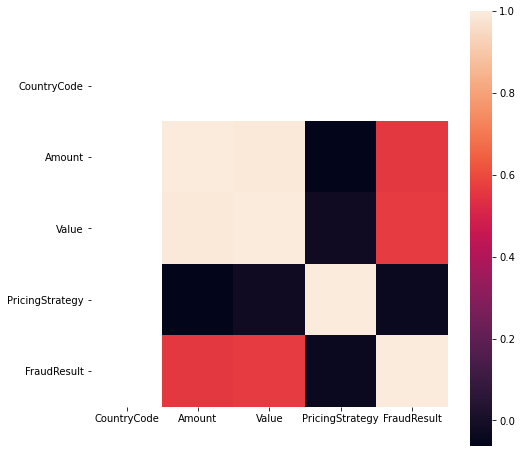

In [9]:
corr = data.corr()
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, square=True)

From our Heatmap, we can see that there is a high correlation between Amount and FraudResult

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

<Figure size 1440x576 with 0 Axes>

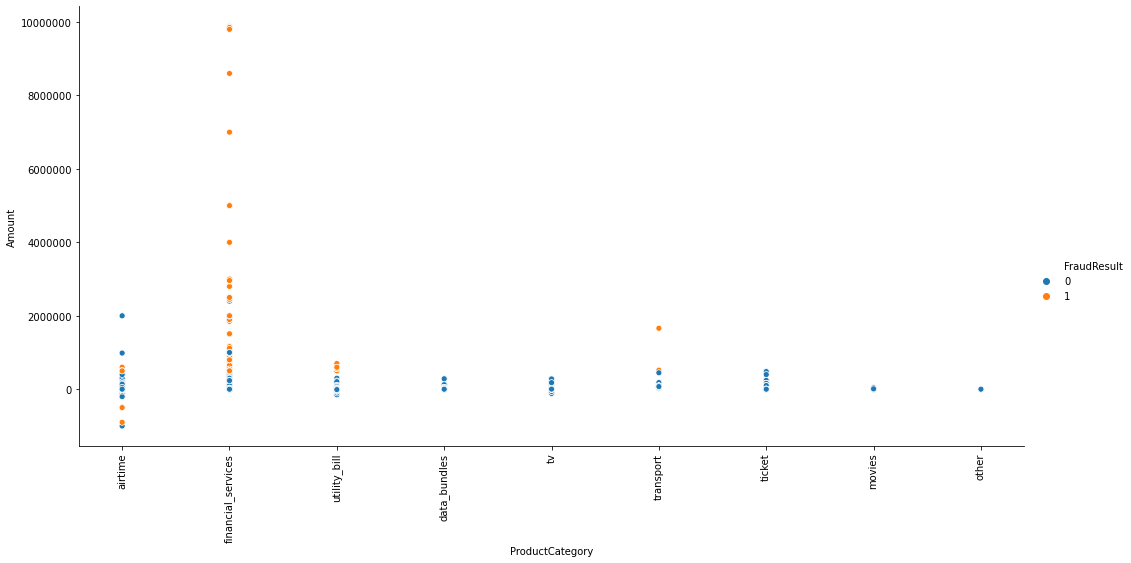

In [10]:
plt.figure(figsize = (20,8))
sns.relplot(x = 'ProductCategory', y = 'Amount', hue = 'FraudResult', data = data,height = 7,aspect = 2)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)

In order to understand the correlation of the heatmap, we plot our ProductCategory against Amount while bringing our FraudResult as hue

We discover that there is high Fraud detection on the financial service product category. This could be as a result of high no of transactions that occur on this category.

Also there is a fair amount of fraud detection on the airtime product catgegory . It is safe to say that categories with high transction have high chances of Fraud Ocurrence

### Reccommendations and Conclusions
Based on our discovery, Security measures should be put in place to check Fraud detection. Looking at our last plot, we see that as the the transactuon value increases, the fraudResult becomes more visible. THis could likely be due to forged figures or negilgence on the provider part to monitor transactions properly. Hence Policies should be put in place to help keep providers in check ensuring that fraud occurrence is to minimal when customers engage their products.

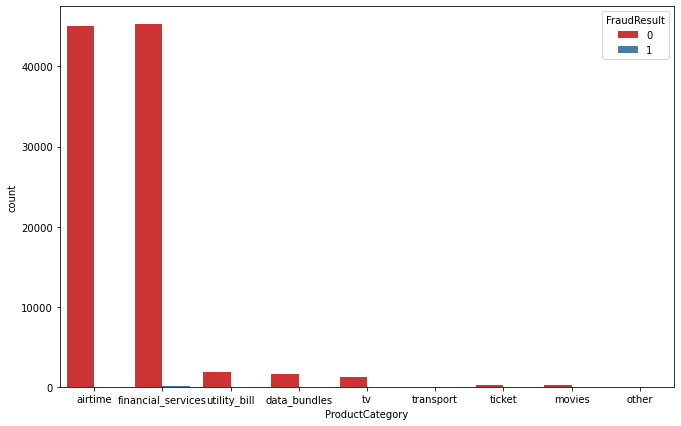

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='ProductCategory',hue='FraudResult',data=data,palette='Set1')

We can see that from the plot above, even though we have high FraudResult in the financial service comapred to  other product category, fraud is still low comapred to other transactions on the financial service category

# Setting up the Data


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionId    95662 non-null  object 
 1   BatchId          95662 non-null  object 
 2   AccountId        95662 non-null  object 
 3   SubscriptionId   95662 non-null  object 
 4   CustomerId       95662 non-null  object 
 5   CurrencyCode     95662 non-null  object 
 6   CountryCode      95662 non-null  int64  
 7   ProviderId       95662 non-null  object 
 8   ProductId        95662 non-null  object 
 9   ProductCategory  95662 non-null  object 
 10  ChannelId        95662 non-null  object 
 11  Amount           95662 non-null  float64
 12  Value            95662 non-null  float64
 13  Date             95662 non-null  object 
 14  Time             95662 non-null  object 
 15  PricingStrategy  95662 non-null  int64  
 16  FraudResult      95662 non-null  int64  
dtypes: float64(2

## Categorical Features

In [13]:
cat_feats = ['ProductCategory']

In [14]:
final_data = pd.get_dummies(data,columns=cat_feats,drop_first=True)

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TransactionId                       95662 non-null  object 
 1   BatchId                             95662 non-null  object 
 2   AccountId                           95662 non-null  object 
 3   SubscriptionId                      95662 non-null  object 
 4   CustomerId                          95662 non-null  object 
 5   CurrencyCode                        95662 non-null  object 
 6   CountryCode                         95662 non-null  int64  
 7   ProviderId                          95662 non-null  object 
 8   ProductId                           95662 non-null  object 
 9   ChannelId                           95662 non-null  object 
 10  Amount                              95662 non-null  float64
 11  Value                               95662

## Train Test Split



In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X =final_data[['Value','PricingStrategy','ProductCategory_data_bundles','ProductCategory_financial_services','ProductCategory_movies',
               'ProductCategory_other','ProductCategory_ticket','ProductCategory_transport','ProductCategory_tv','ProductCategory_utility_bill']]


In [18]:
X

,Value,PricingStrategy,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,1000.0,2,0,0,0,0,0,0,0,0
1,20.0,2,0,1,0,0,0,0,0,0
2,500.0,2,0,0,0,0,0,0,0,0
3,20000.0,2,0,0,0,0,0,0,0,1
4,644.0,2,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
95657,1000.0,2,0,1,0,0,0,0,0,0
95658,1000.0,2,0,0,0,0,0,0,0,0
95659,20.0,2,0,1,0,0,0,0,0,0
95660,3000.0,2,0,0,0,0,0,0,1,0


In [19]:
y = final_data['FraudResult']

In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [25]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28650
           1       0.98      0.82      0.89        49

    accuracy                           1.00     28699
   macro avg       0.99      0.91      0.94     28699
weighted avg       1.00      1.00      1.00     28699



In [28]:
print(confusion_matrix(y_test,predictions))

[[28649     1]
 [    9    40]]


## Training the Random Forest model


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators=600)

In [31]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

In [32]:
predictions = rfc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28650
           1       0.98      0.84      0.90        49

    accuracy                           1.00     28699
   macro avg       0.99      0.92      0.95     28699
weighted avg       1.00      1.00      1.00     28699



In [35]:
print(confusion_matrix(y_test,predictions))

[[28649     1]
 [    8    41]]


# Testing the test.csv file

In [36]:
test = pd.read_csv('test.csv')

In [37]:
test.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [38]:
categorical_variable = ['ProductCategory']

In [39]:
test_data = pd.get_dummies(data,columns=categorical_variable,drop_first=True)

In [40]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   TransactionId                       95662 non-null  object 
 1   BatchId                             95662 non-null  object 
 2   AccountId                           95662 non-null  object 
 3   SubscriptionId                      95662 non-null  object 
 4   CustomerId                          95662 non-null  object 
 5   CurrencyCode                        95662 non-null  object 
 6   CountryCode                         95662 non-null  int64  
 7   ProviderId                          95662 non-null  object 
 8   ProductId                           95662 non-null  object 
 9   ChannelId                           95662 non-null  object 
 10  Amount                              95662 non-null  float64
 11  Value                               95662

In [41]:
X_new_Test_data=test_data[['Value','PricingStrategy','ProductCategory_data_bundles','ProductCategory_financial_services','ProductCategory_movies',
               'ProductCategory_other','ProductCategory_ticket','ProductCategory_transport','ProductCategory_tv','ProductCategory_utility_bill']]


In [42]:
X_new_Test_data.head()

,Value,PricingStrategy,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,1000.0,2,0,0,0,0,0,0,0,0
1,20.0,2,0,1,0,0,0,0,0,0
2,500.0,2,0,0,0,0,0,0,0,0
3,20000.0,2,0,0,0,0,0,0,0,1
4,644.0,2,0,1,0,0,0,0,0,0


## Predictions and Evaluation test.csv USING Random Forest

In [43]:
predictions_RandomForest = rfc.predict(X_new_Test_data)

In [44]:
predictions_RandomForest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
df = pd.DataFrame(predictions_RandomForest, columns=['Predictions'])
df.to_csv("predictions_RandomForest.csv",index=False)

## Predictions and Evaluation test.csv USING Decision Tree

In [46]:
predictions_DecisionTree = dtree.predict(X_new_Test_data)

In [47]:
predictions_DecisionTree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
df = pd.DataFrame(predictions_DecisionTree, columns=['Predictions'])
df.to_csv("predictions_DecisionTree.csv",index=False)

### LOADING THE CLEAN_TRAIN DATA INTO SQL

In [49]:
import pyodbc


# Connect to SQL Server
db_engine = pyodbc.connect("Driver={SQL Server Native Client 11.0};"

                      "Server=172.10.9.201\MSSQLSERVER2;"

                      "Database=DataAnalytics;"

                      "uid=datateam;"

                      "pwd=password;"
                      'Trusted_Connection=yes;')
cursor = db_engine.cursor()   
               
cursor.execute('CREATE TABLE test_data (TransactionId varchar(50),BatchId varchar(50),AccountId varchar(50),SubscriptionId  varchar(50),CustomerId varchar(50),CurrencyCode varchar(10),CountryCode  varchar(10),ProviderId   varchar(50),ProductId varchar(50),ProductCategory varchar(50), ChannelId  varchar(50),  Amount  money , Value   money ,      Date    date, Time Time , PricingStrategy   int ,FraudResult  smallint)')

# Insert DataFrame to Table
for row in df_test.itertuples():
    cursor.execute('''
                INSERT INTO DataAnalytics.dbo.test_data (TransactionId','BatchId','AccountId','SubscriptionId','CustomerId','CurrencyCode'
                                    ,'CountryCode','ProviderId','ProductId','ProductCategory','ChannelId','Amount','Value',
                                   'Date','Time','PricingStrategy','FraudResult)
                VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)
                ''',
                row.TransactionId, 
                row.BatchId,
                row.AccountId,
                row.SubscriptionId,
                row.CustomerId,
                row.CurrencyCode,
                row.CountryCode,
                row.ProviderId,
                row.ProductId,
                row.ProductCategory,
                row.ChannelId,
                row.Amount,
                row.Value,
                row.Date,
                row.Time,
                row.PricingStrategy,
                row.FraudResult,
                
                )
db_engine.commit()

OperationalError: ('08001', '[08001] [Microsoft][SQL Server Native Client 11.0]SQL Server Network Interfaces: Error Locating Server/Instance Specified [xFFFFFFFF].  (-1) (SQLDriverConnect); [08001] [Microsoft][SQL Server Native Client 11.0]Login timeout expired (0); [08001] [Microsoft][SQL Server Native Client 11.0]A network-related or instance-specific error has occurred while establishing a connection to SQL Server. Server is not found or not accessible. Check if instance name is correct and if SQL Server is configured to allow remote connections. For more information see SQL Server Books Online. (-1)')